In [1]:
# Importo paquetes

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Para ver mejor

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Cargo el primer train - con la proporción de labels positivos original

train = pd.read_csv("./DATA/CLIC_TRAIN_1.csv", sep=';')
test = pd.read_csv("./DATA/CLIC_TEST.csv", sep=';')
train.head(100)

,Label,action_categorical_0,action_categorical_1,action_categorical_3,action_categorical_5,action_categorical_7,auction_boolean_0,auction_categorical_1,auction_categorical_4,auction_categorical_5,auction_categorical_6,auction_categorical_8,creative_categorical_1,creative_categorical_4,creative_categorical_9,creative_categorical_11,creative_categorical_8,auction_bidfloor,creative_width,creative_height,device_id_type,has_video,timezone_offset,auction_time,ID
0,0,e350c7c7,e220fce9,e9c266f7,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,c99696ad,ed14c0c3,198c733d,977c2300,NaN,65dcab89,43c867fd,Otros,"1,52",0,0,6324b367,0,1,1516533169,{D5191ECC-DFFF-4280-A177-B43249724A1B}
1,0,e350c7c7,e220fce9,e9c266f7,6bc0e29c,31b31f57,NaN,714a9147,ef64698f,c99696ad,Otros,Otros,977c2300,NaN,NaN,43c867fd,Otros,"0,38",0,0,6324b367,0,1,1516040907,{93351974-EBA0-40FA-9162-7DF4A1D1F187}
2,0,9915ffee,dc24b79b,7ce4e1a3,6bc0e29c,e2538fca,47980dda,714a9147,ef64698f,ec8edf0b,0fa26b70,Otros,977c2300,7f1dcf83,65dcab89,65dcab89,Otros,"0,33000000000000002",320,50,c1d12c8e,0,1,1515991389,{FB92D6A0-69C0-4C45-AC7F-C113C473296E}
3,0,e350c7c7,e220fce9,e9c266f7,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,c99696ad,434922cf,e361d5bc,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"0,76922999999999997",320,50,6324b367,0,1,1516130005,{8B122895-581B-4DD9-B4B8-C0734A58BEBE}
4,0,11b7af3d,ac0f362d,cb80abab,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,c99696ad,434922cf,e361d5bc,35fcfcbb,7f1dcf83,43c867fd,65dcab89,Otros,"1,3698629999999998",320,480,6324b367,0,1,1516545542,{DD626BE9-B249-4D44-820F-CE82A5C2AC3B}
5,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,ef64698f,ec8edf0b,6f5a8fcb,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"0,14000000000000001",320,50,c1d12c8e,0,1,1516255432,{BDD91043-B249-4A28-A4D8-1C505B0EB7BF}
6,0,11b7af3d,ac0f362d,cb80abab,6bc0e29c,31b31f57,47980dda,714a9147,7db9dc73,c99696ad,Otros,e361d5bc,35fcfcbb,7f1dcf83,65dcab89,65dcab89,Otros,"0,50900000000000023",320,50,6324b367,0,1,1516110526,{FE977ECC-BFCB-4C59-96EA-7EAC9DAA6531}
7,0,9915ffee,dc24b79b,7ce4e1a3,6bc0e29c,e2538fca,79ceee49,714a9147,ef64698f,ec8edf0b,Otros,198c733d,977c2300,7f1dcf83,65dcab89,65dcab89,Otros,"0,14000000000000001",300,250,c1d12c8e,0,1,1516445173,{25CAB91A-2BEE-4A83-B5B4-FE7220C19431}
8,0,11b7af3d,0d132da2,f51428b0,6bc0e29c,31b31f57,47980dda,714a9147,7db9dc73,ec8edf0b,7d7776ec,856f1b75,35fcfcbb,7f1dcf83,65dcab89,65dcab89,Otros,"0,61728395061728392",320,50,c1d12c8e,0,1,1516145165,{9D204EE0-ECFC-4F39-B0E6-D8FB63710811}
9,0,9915ffee,dc24b79b,7ce4e1a3,6bc0e29c,e2538fca,47980dda,714a9147,ef64698f,ec8edf0b,fccb6ea5,e361d5bc,977c2300,150d94b7,65dcab89,65dcab89,Otros,"0,52631499999999998",320,50,c1d12c8e,0,1,1516333085,{F5416531-0D0E-44C9-A037-3E6AB7CC54D7}


In [4]:
train.Label.value_counts()

0    1037289
1      13277
Name: Label, dtype: int64

In [5]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID'],
      dtype='object')

In [6]:
train.dtypes

Label                       int64
action_categorical_0       object
action_categorical_1       object
action_categorical_3       object
action_categorical_5       object
action_categorical_7       object
auction_boolean_0          object
auction_categorical_1      object
auction_categorical_4      object
auction_categorical_5      object
auction_categorical_6      object
auction_categorical_8      object
creative_categorical_1     object
creative_categorical_4     object
creative_categorical_9     object
creative_categorical_11    object
creative_categorical_8     object
auction_bidfloor           object
creative_width              int64
creative_height             int64
device_id_type             object
has_video                   int64
timezone_offset            object
auction_time                int64
ID                         object
dtype: object

In [7]:
train.isnull().sum()

Label                           0
action_categorical_0            0
action_categorical_1            0
action_categorical_3            0
action_categorical_5            0
action_categorical_7            0
auction_boolean_0           19612
auction_categorical_1           0
auction_categorical_4        3719
auction_categorical_5           0
auction_categorical_6           0
auction_categorical_8           0
creative_categorical_1          0
creative_categorical_4     157864
creative_categorical_9      12957
creative_categorical_11         0
creative_categorical_8          0
auction_bidfloor                0
creative_width                  0
creative_height                 0
device_id_type                  0
has_video                       0
timezone_offset                 0
auction_time                    0
ID                              0
dtype: int64

In [8]:
# Covertir Obj a Float

train['auction_bidfloor'] = train['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['auction_bidfloor'] = test['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

train['timezone_offset'] = train['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['timezone_offset'] = test['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [9]:
train.isnull().sum()

Label                           0
action_categorical_0            0
action_categorical_1            0
action_categorical_3            0
action_categorical_5            0
action_categorical_7            0
auction_boolean_0           19612
auction_categorical_1           0
auction_categorical_4        3719
auction_categorical_5           0
auction_categorical_6           0
auction_categorical_8           0
creative_categorical_1          0
creative_categorical_4     157864
creative_categorical_9      12957
creative_categorical_11         0
creative_categorical_8          0
auction_bidfloor                0
creative_width                  0
creative_height                 0
device_id_type                  0
has_video                       0
timezone_offset                 0
auction_time                    0
ID                              0
dtype: int64

In [10]:
# Creamos dummies para train y para test

categories = ['action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8',
       'device_id_type']

for category in categories:
    series = train[category]
    dummies = pd.get_dummies(series, prefix=category,  drop_first=True)
    train = pd.concat([train, dummies], axis=1)
    
for category in categories:
    series = test[category]
    dummies = pd.get_dummies(series, prefix=category, drop_first=True)
    test = pd.concat([test, dummies], axis=1)

In [11]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'ac

In [12]:
train.describe()

,Label,auction_bidfloor,creative_width,creative_height,has_video,timezone_offset,auction_time,action_categorical_0_604d011f,action_categorical_0_9915ffee,action_categorical_0_Otros,action_categorical_0_c2e4f717,action_categorical_0_e350c7c7,action_categorical_1_3074db21,action_categorical_1_6d1ca31b,action_categorical_1_Otros,action_categorical_1_ac0f362d,action_categorical_1_d9eb38d8,action_categorical_1_dc24b79b,action_categorical_1_e220fce9,action_categorical_1_e709bbc0,action_categorical_1_f71d2f9b,action_categorical_3_62c903fc,action_categorical_3_7ce4e1a3,action_categorical_3_9ebdf82c,action_categorical_3_Otros,action_categorical_3_cb80abab,action_categorical_3_e7329a92,action_categorical_3_e9c266f7,action_categorical_3_f51428b0,action_categorical_5_79ceee49,action_categorical_7_e2538fca,auction_boolean_0_47980dda,auction_boolean_0_79ceee49,auction_categorical_1_714a9147,auction_categorical_1_ababfacb,auction_categorical_4_ef64698f,auction_categorical_5_ec8edf0b,auction_categorical_6_3117d02e,auction_categorical_6_434922cf,auction_categorical_6_6f5a8fcb,auction_categorical_6_7d7776ec,auction_categorical_6_Otros,auction_categorical_6_e70caf72,auction_categorical_6_ed14c0c3,auction_categorical_6_fccb6ea5,auction_categorical_8_856f1b75,auction_categorical_8_Otros,auction_categorical_8_e361d5bc,creative_categorical_1_977c2300,creative_categorical_4_7f1dcf83,creative_categorical_4_f3b258d1,creative_categorical_9_65dcab89,creative_categorical_11_65dcab89,creative_categorical_8_5e63aaac,creative_categorical_8_Otros,creative_categorical_8_d9d53fe0,device_id_type_6324b367,device_id_type_c1d12c8e
count,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06,1.050566e+06
mean,1.263795e-02,5.278799e-01,2.721000e+02,1.115461e+02,1.646351e-02,1.770117e+00,1.516299e+09,1.498821e-01,2.648058e-01,8.958028e-02,1.781183e-01,9.415877e-02,1.315101e-01,6.103091e-02,3.667737e-02,1.395924e-01,1.346398e-01,1.301660e-01,9.415877e-02,4.660821e-02,1.417541e-01,1.315101e-01,1.301660e-01,1.346398e-01,1.187170e-01,1.395924e-01,4.660821e-02,9.415877e-02,8.386241e-02,1.581462e-01,6.113704e-01,6.879929e-01,2.810990e-01,8.107544e-01,3.604724e-02,6.932073e-01,4.221562e-01,7.706132e-02,1.198002e-01,5.316753e-02,6.447191e-02,1.943543e-01,5.873881e-02,2.416421e-01,7.784375e-02,1.223217e-01,8.533876e-02,1.327970e-01,6.308019e-01,3.390020e-01,4.403341e-03,9.280930e-01,8.627064e-01,8.090877e-05,9.826141e-01,4.403341e-03,5.750081e-01,4.221562e-01
std,1.117061e-01,1.005560e+00,1.220691e+02,1.269293e+02,1.272497e-01,1.886309e+00,1.784247e+05,3.569560e-01,4.412300e-01,2.855796e-01,3.826125e-01,2.920496e-01,3.379575e-01,2.393871e-01,1.879686e-01,3.465638e-01,3.413386e-01,3.364862e-01,2.920496e-01,2.107983e-01,3.487979e-01,3.379575e-01,3.364862e-01,3.413386e-01,3.234553e-01,3.465638e-01,2.107983e-01,2.920496e-01,2.771815e-01,3.648782e-01,4.874391e-01,4.633129e-01,4.495359e-01,3.917038e-01,1.864078e-01,4.611628e-01,4.939034e-01,2.666888e-01,3.247279e-01,2.243675e-01,2.455918e-01,3.957030e-01,2.351353e-01,4.280787e-01,2.679257e-01,3.276571e-01,2.793853e-01,3.393554e-01,4.825879e-01,4.733707e-01,6.621144e-02,2.583339e-01,3.441572e-01,8.994570e-03,1.307043e-01,6.621144e-02,4.943420e-01,4.939034e-01
min,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.515975e+09,0.000000

In [13]:
y_train = train[['Label']]
x_train = train[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

y_test = test[['Label']]
x_test = test[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

del train, test

In [14]:
x_test, x_test_2, y_test, y_test_2 = train_test_split(x_test, y_test, test_size=0.4, random_state=53)

In [15]:
x_test.dtypes

auction_bidfloor                    float64
creative_width                        int64
creative_height                       int64
has_video                             int64
auction_time                          int64
action_categorical_0_604d011f         uint8
action_categorical_0_9915ffee         uint8
action_categorical_0_Otros            uint8
action_categorical_0_c2e4f717         uint8
action_categorical_0_e350c7c7         uint8
action_categorical_1_3074db21         uint8
action_categorical_1_6d1ca31b         uint8
action_categorical_1_Otros            uint8
action_categorical_1_ac0f362d         uint8
action_categorical_1_d9eb38d8         uint8
action_categorical_1_dc24b79b         uint8
action_categorical_1_e220fce9         uint8
action_categorical_1_e709bbc0         uint8
action_categorical_1_f71d2f9b         uint8
action_categorical_3_62c903fc         uint8
action_categorical_3_7ce4e1a3         uint8
action_categorical_3_9ebdf82c         uint8
action_categorical_3_Otros      

In [16]:
# Normalización

se = StandardScaler()
x_train = se.fit_transform(x_train)
x_test = se.transform(x_test)
x_test_2 = se.transform(x_test_2)

In [17]:
models = [GaussianNB(), LogisticRegression()]

In [18]:
params = [[{}],[{'C': [0.01, 0.1, 1, 10, 100] }]]

In [19]:
grids = []
i = 0
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)

GridSearchCV(cv=3, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid=[{}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.3s finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.7min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.5min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.0min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.5min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_probs = []
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)
    y_pred = i.predict(x_test)
    print (confusion_matrix(y_test, y_pred))
    print (recall_score(y_test, y_pred))
    print (precision_score(y_test, y_pred))
    y_aux = i.predict_proba(x_test)
    y_probs.append(y_aux[:,1])

0.7561392480088199
GaussianNB(priors=None)
{}
[[69528 78569]
 [  294  1571]]
0.8423592493297587
0.01960319440978288
0.7954289961168095
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 0.01}
[[148081     16]
 [  1864      1]]
0.0005361930294906167
0.058823529411764705


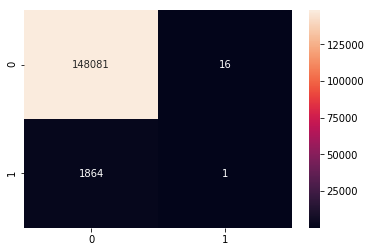

In [21]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d");

In [22]:
y_probs

[array([1.75046220e-11, 9.99609949e-01, 9.99987697e-01, ...,
        4.66800116e-02, 9.99995238e-01, 2.24941485e-02]),
 array([0.00214831, 0.0070395 , 0.01490983, ..., 0.00374508, 0.01626533,
        0.00671453])]

In [23]:
(y_probs[0] > 0.6).astype(int)

array([0, 1, 1, ..., 0, 1, 0])

Acuracy:  0.43218281964764405
Precision:  0.01837759067357513
Recall:  0.8520107238605898
Acuracy:  0.4411384217335058
Precision:  0.018644924045725295
Recall:  0.8509383378016085
Acuracy:  0.45412837918939464
Precision:  0.01902379778496615
Recall:  0.8482573726541555
Acuracy:  0.4741134420719916
Precision:  0.01960319440978288
Recall:  0.8423592493297587
Acuracy:  0.49386511249516546
Precision:  0.020206340565622004
Recall:  0.8359249329758713
Acuracy:  0.510742721489444
Precision:  0.020698993203115575
Recall:  0.8278820375335121
Acuracy:  0.5238527093530361
Precision:  0.021101056430175062
Recall:  0.8214477211796246


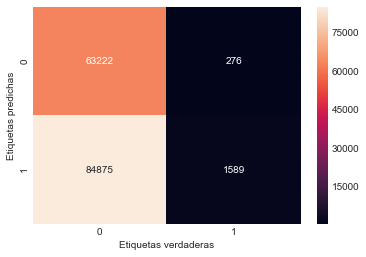

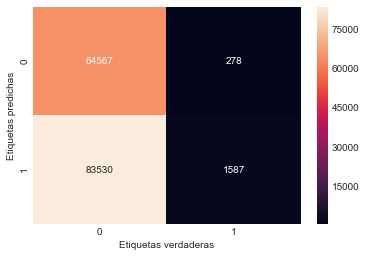

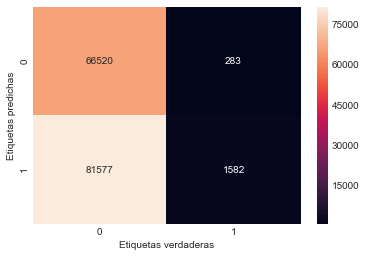

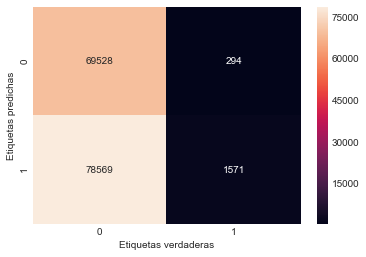

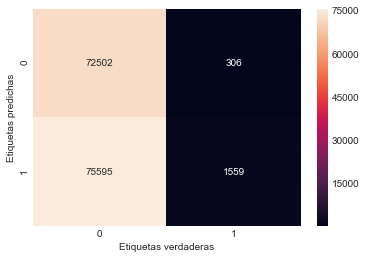

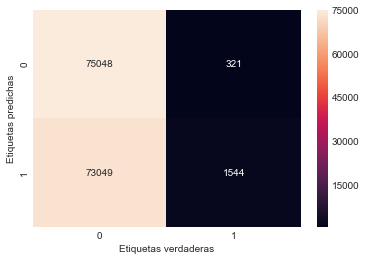

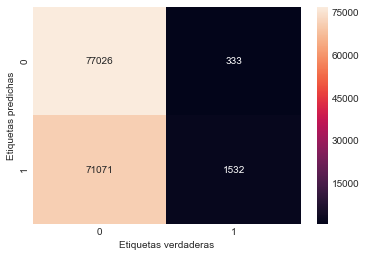

In [24]:
import seaborn as sns
for j in range(7):
    corte = j * 0.1 + 0.2
    plt.figure(j)
    y_pred_mat = (y_probs[0] > corte).astype(int)
    mat = confusion_matrix(y_test, y_pred_mat)
    print('Acuracy: ',accuracy_score(y_test, y_pred_mat))
    print('Precision: ',precision_score(y_test, y_pred_mat))
    print('Recall: ',recall_score(y_test, y_pred_mat))
    sns.set_style('white')
    sns.heatmap(mat.T, annot=True, fmt='d')
    plt.xlabel('Etiquetas verdaderas')
    plt.ylabel('Etiquetas predichas');
    #plt.savefig(".\\matriz_de_confusion_%s_%s.png" % (str(i), str(j)))

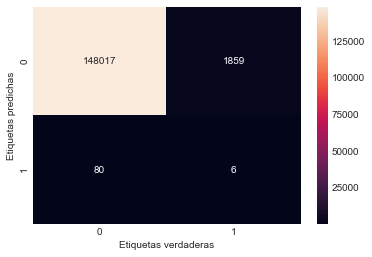

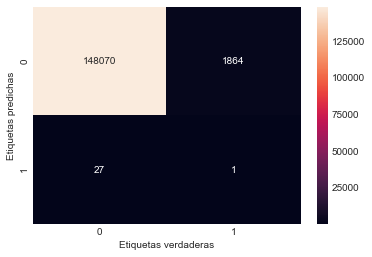

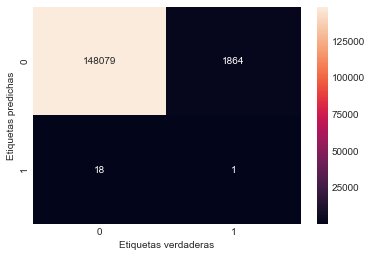

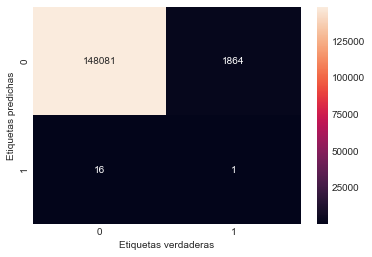

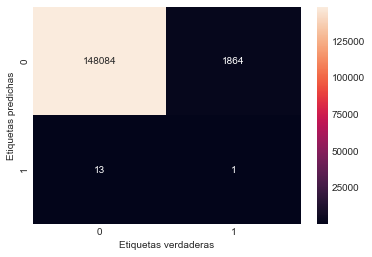

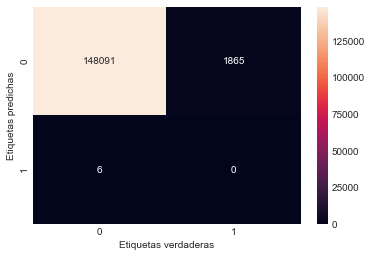

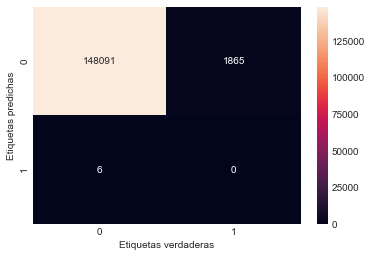

In [25]:
import seaborn as sns
for j in range(7):
    corte = j * 0.1 + 0.2
    plt.figure(j)
    y_pred_mat = (y_probs[1] > corte).astype(int)
    mat = confusion_matrix(y_test, y_pred_mat)
    sns.set_style('white')
    sns.heatmap(mat.T, annot=True, fmt='d')
    plt.xlabel('Etiquetas verdaderas')
    plt.ylabel('Etiquetas predichas');
    #plt.savefig(".\\matriz_de_confusion_%s_%s.png" % (str(i), str(j)))

In [26]:
y_test_2.Label.value_counts()

0    98638
1     1337
Name: Label, dtype: int64

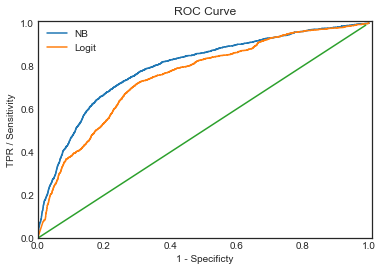

In [27]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs[0])
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show()

In [28]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.7928507765027055
AUC-Logit= 0.7503452314900996


In [29]:
y_probs = []
for i in grids:
    y_pred = i.predict(x_test_2)
    print (confusion_matrix(y_test_2, y_pred))
    print (recall_score(y_test_2, y_pred))
    print (precision_score(y_test_2, y_pred))
    y_aux = i.predict_proba(x_test_2)
    y_probs.append(y_aux[:,1])

[[46218 52420]
 [  216  1121]]
0.8384442782348541
0.020937225677518163
[[98626    12]
 [ 1337     0]]
0.0
0.0


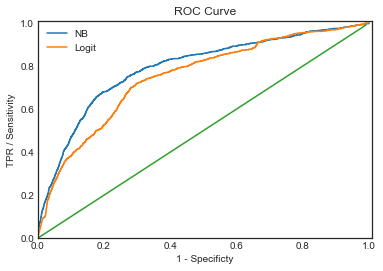

In [30]:
fpr_log,tpr_log,thr_log = roc_curve(y_test_2, y_probs[0])
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test_2, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show() 

In [31]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.7903989737380944
AUC-Logit= 0.74928412411601


In [32]:
models = [svm.SVC(),
          KNeighborsClassifier()]

In [33]:
params = [
    
    [
        {'C': [10], 'kernel': ['linear']},
          
        {'C': [10], 'gamma': [0.01], 'kernel': ['rbf']}
    ],
          {'n_neighbors': [3,5],
           'weights' : ['uniform'],
           'p' : [1]}
]

In [34]:
# Con estos modelos tarda mil años...

'''for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)'''

"for i in range(len(models)):\n    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)\n    print (gs)\n    fit = gs.fit(x_train, y_train)\n    grids.append(fit)"